In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

#pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('display.precision', 4)
pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 180)


idx = pd.IndexSlice

In [2]:
# Load merged rec HDF store based on config

#config_file = '/opt/data36/daliu/realtime/spykshrk/test/test_animal.config.json'
config_file = '/opt/data36/daliu/realtime/spykshrk/ripple_dec/bond.config.json'
config = json.load(open(config_file, 'r'))

hdf_file = os.path.join(config['files']['output_dir'],
                        '{}.rec_merged.h5'.format(config['files']['prefix']))

store = pd.HDFStore(hdf_file, mode='r')


In [3]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /opt/data/daliu/realtime/spykshrk/ripple_dec/bond.rec_merged.h5
/rec_1              frame        (shape->[11327852,10])
/rec_10             frame        (shape->[2782,4])     
/rec_100            frame        (shape->[46336315,8]) 
/rec_11             frame        (shape->[116,4])      
/rec_3              frame        (shape->[70087,154])  
/rec_4              frame        (shape->[4635,152])   

In [4]:
ripple_data = store['rec_1']

ntrode_list = ripple_data.loc[:,'ntrode_id'].unique()

stim_lockout = store['rec_11']

In [5]:
stim_lockout_ranges = stim_lockout.pivot(index='lockout_num',columns='lockout_state', values='timestamp')
stim_lockout_ranges = stim_lockout_ranges.reindex(columns=[1,0])

In [6]:
stim_lockout_ranges.iloc[0][1]

74648842

array([ 5, 17, 11, 12, 13, 14, 19, 29])

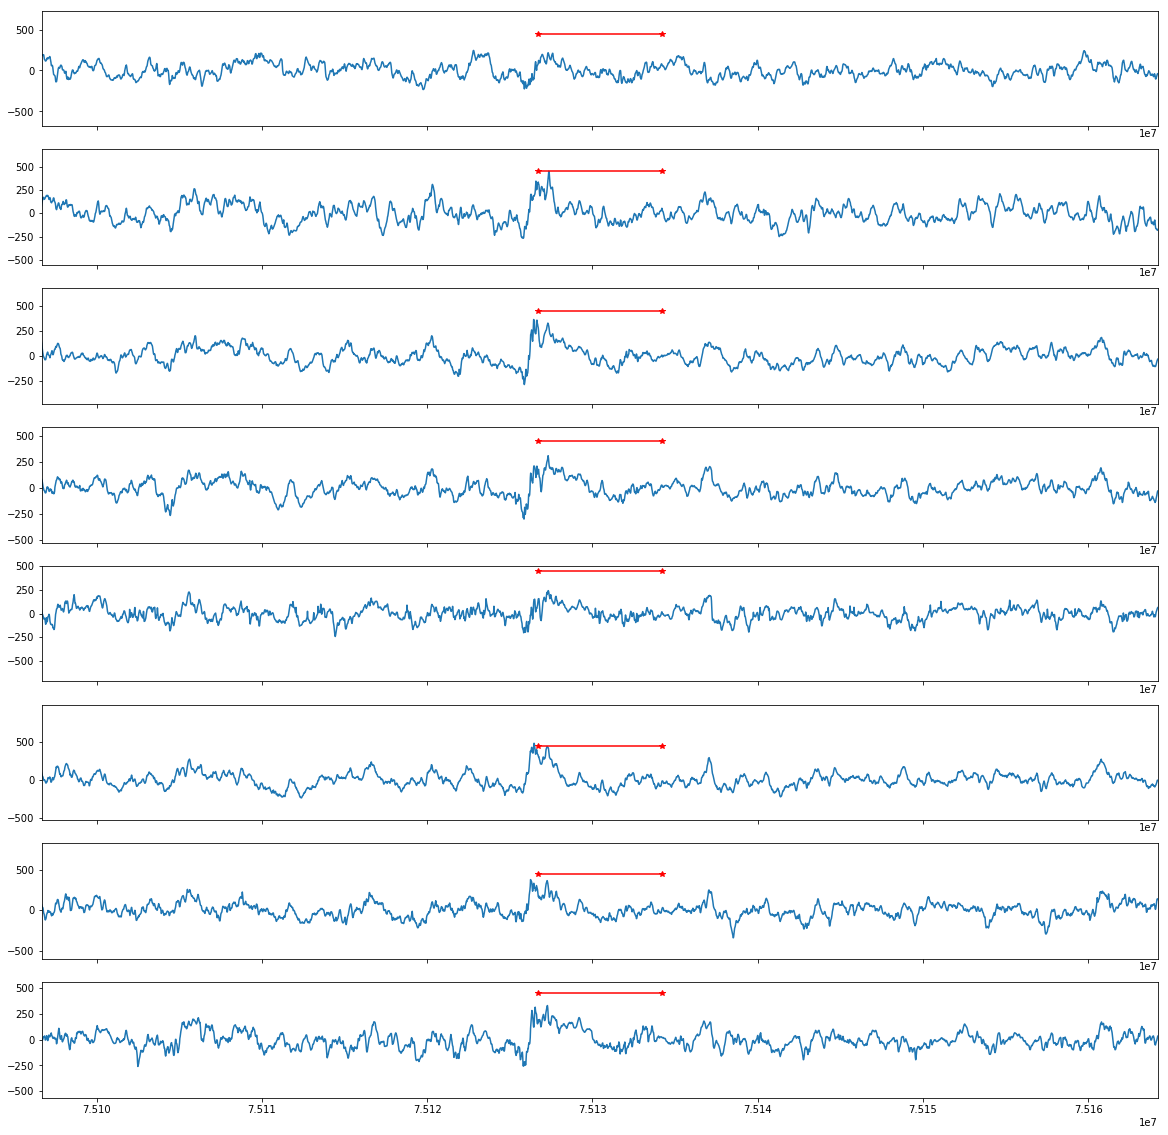

In [7]:
ripple_ind = 3

plt.figure(figsize=[20,20])

for group_ind, group in enumerate(ripple_data.groupby('ntrode_id')):
    ax = plt.subplot(len(ntrode_list), 1, group_ind+1)
    ntrode_id = group[0]
    lfp_data = group[1]['lfp_data']
    timestamp = group[1]['timestamp']
    plt.plot(timestamp, lfp_data)
    plt.plot(stim_lockout_ranges.values.transpose(), np.tile([[450], [450]], [1, len(stim_lockout_ranges)]), 'r-*' )
    
    plt.xlim(stim_lockout_ranges.iloc[ripple_ind][1] - 1*30000, stim_lockout_ranges.iloc[ripple_ind][0] + 1*30000)
    
    if group_ind != len(ntrode_list)-1:
        plt.setp(ax.get_xticklabels(), visible=False)

    
plt.show()

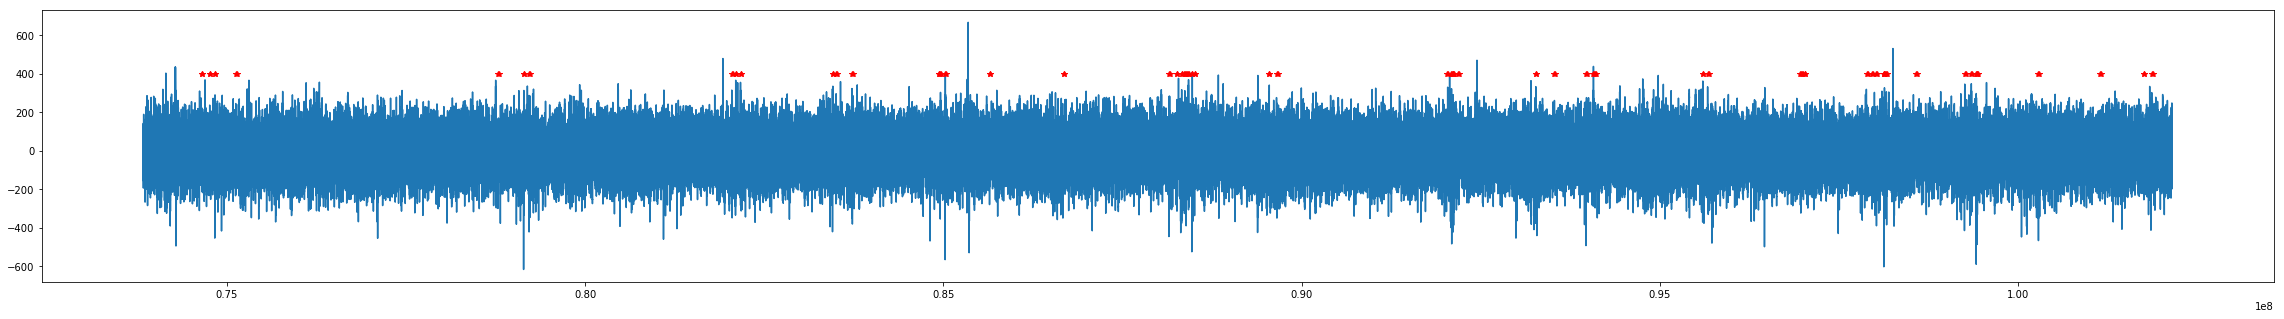

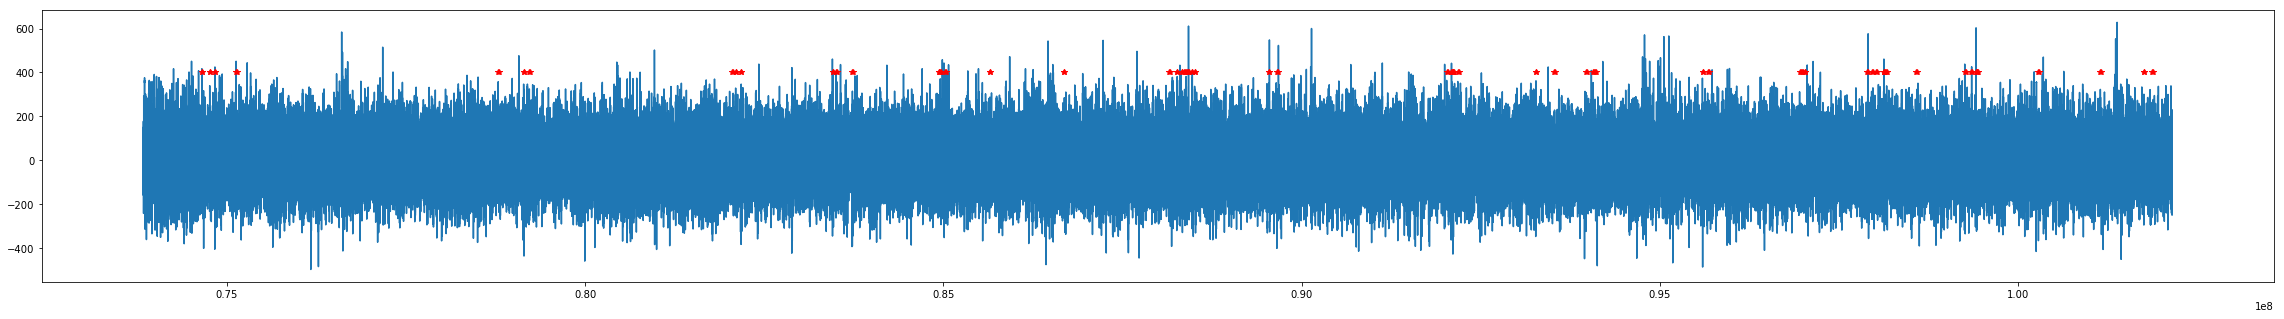

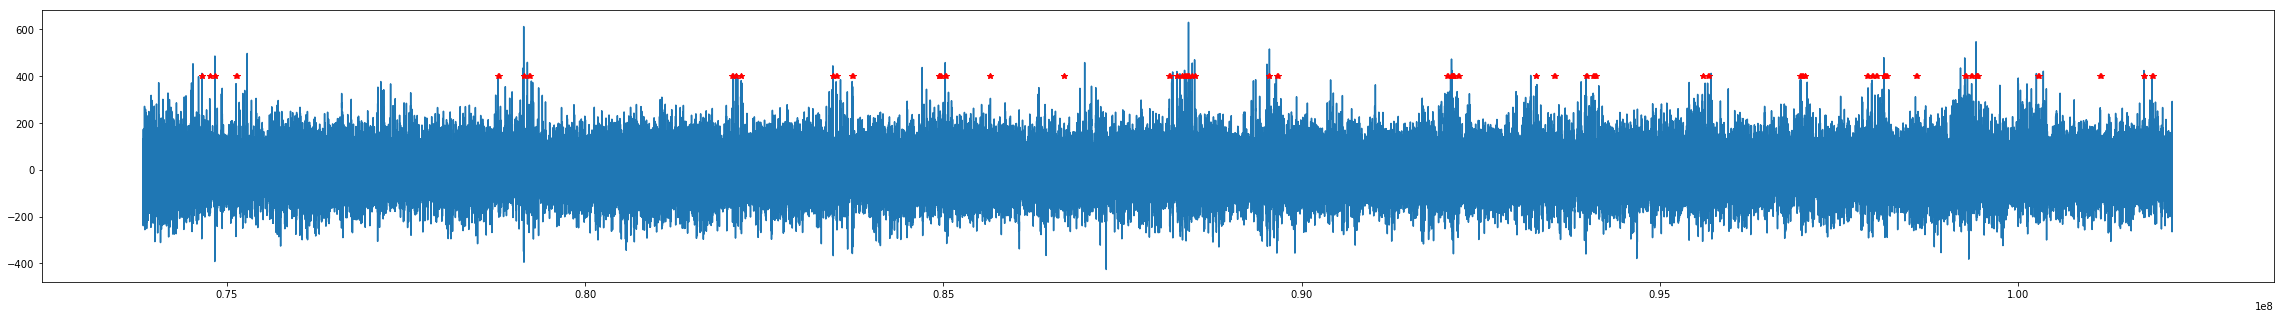

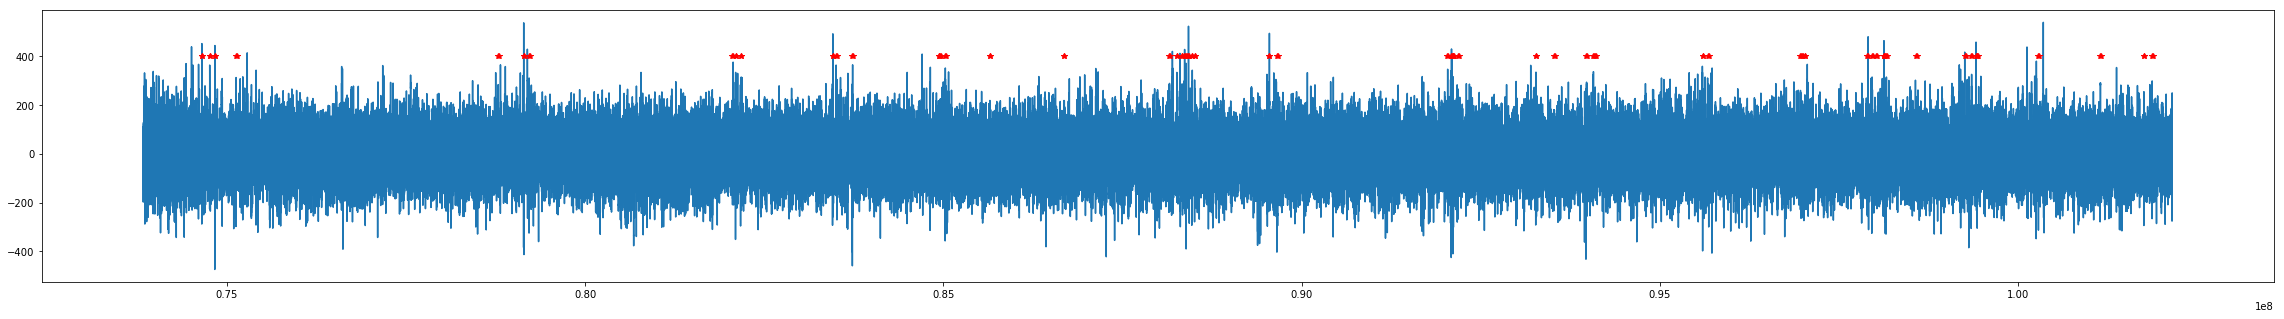

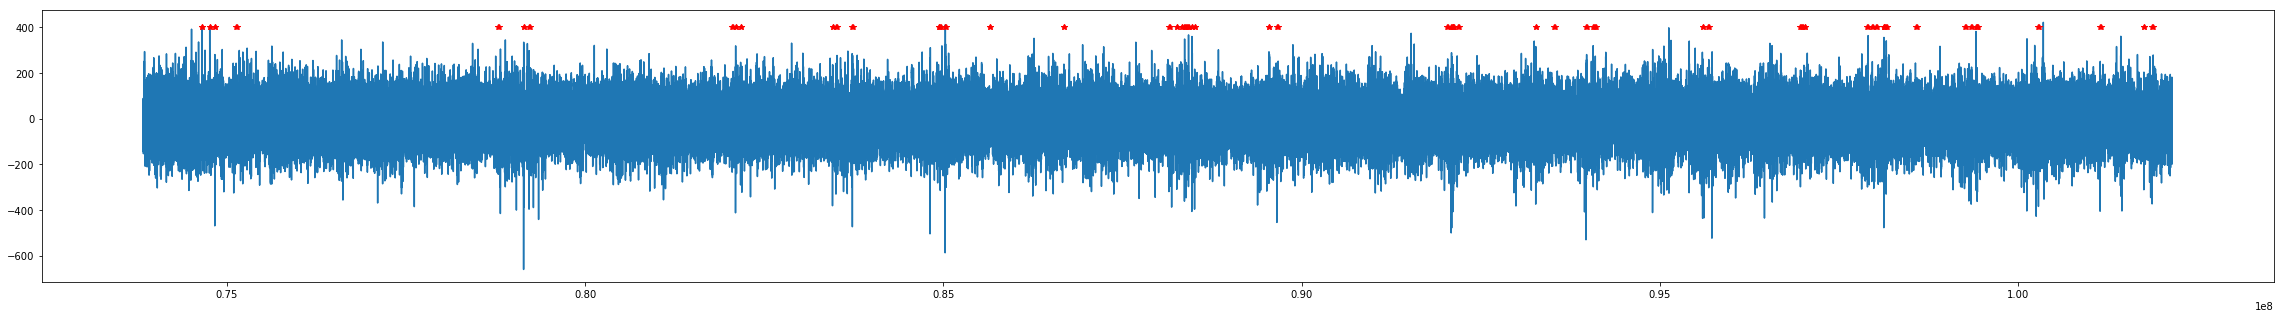

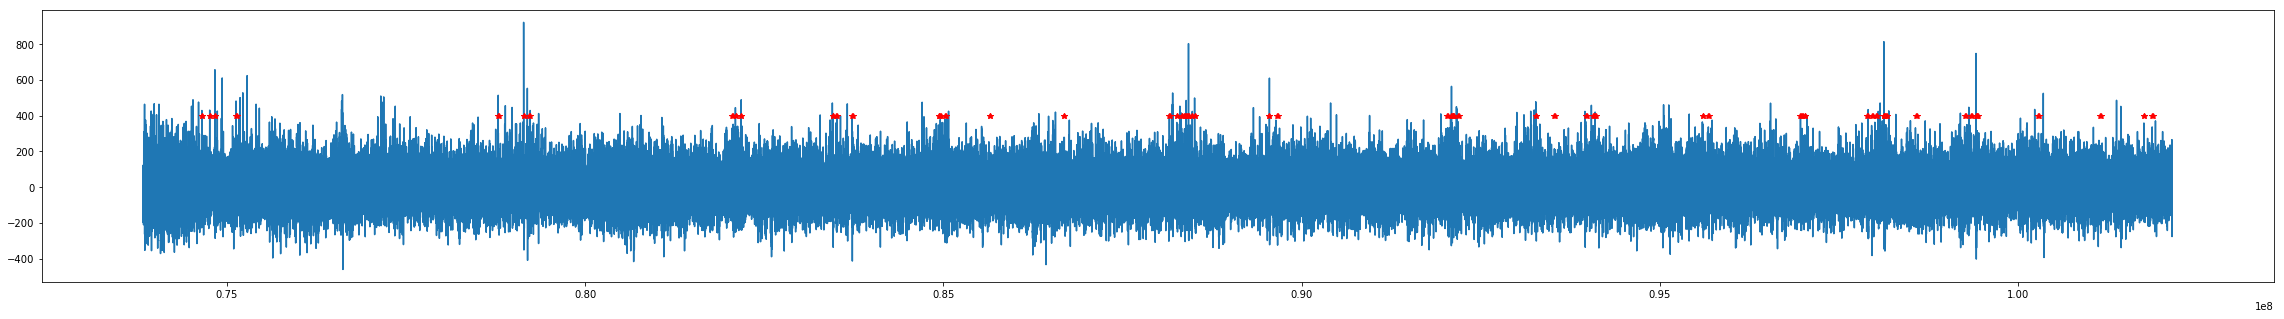

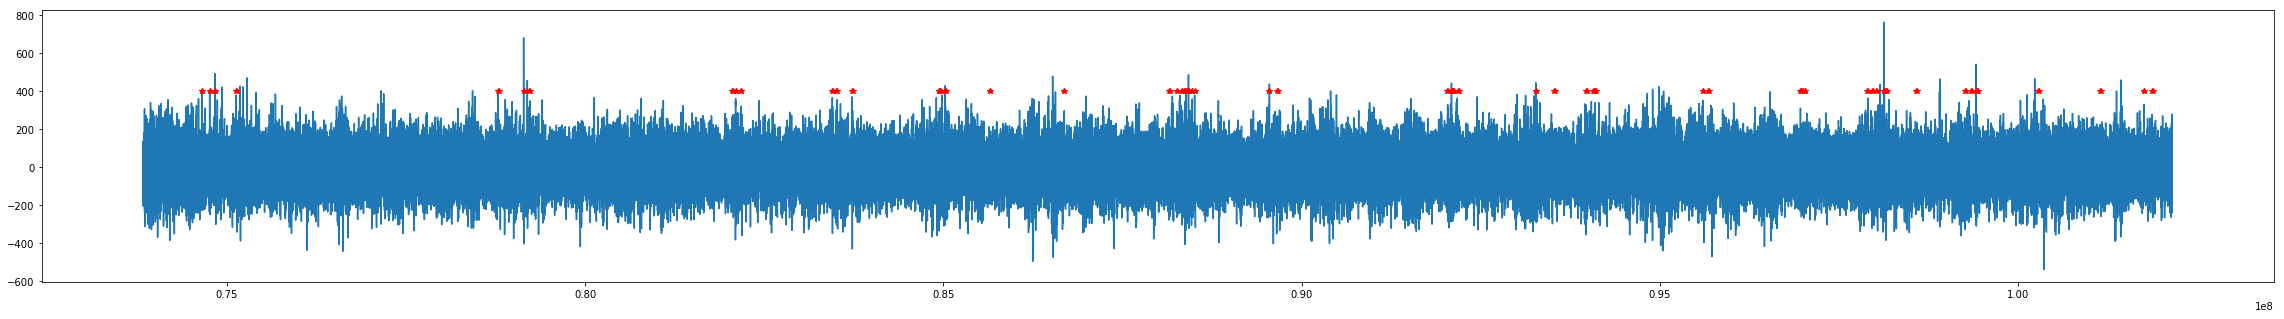

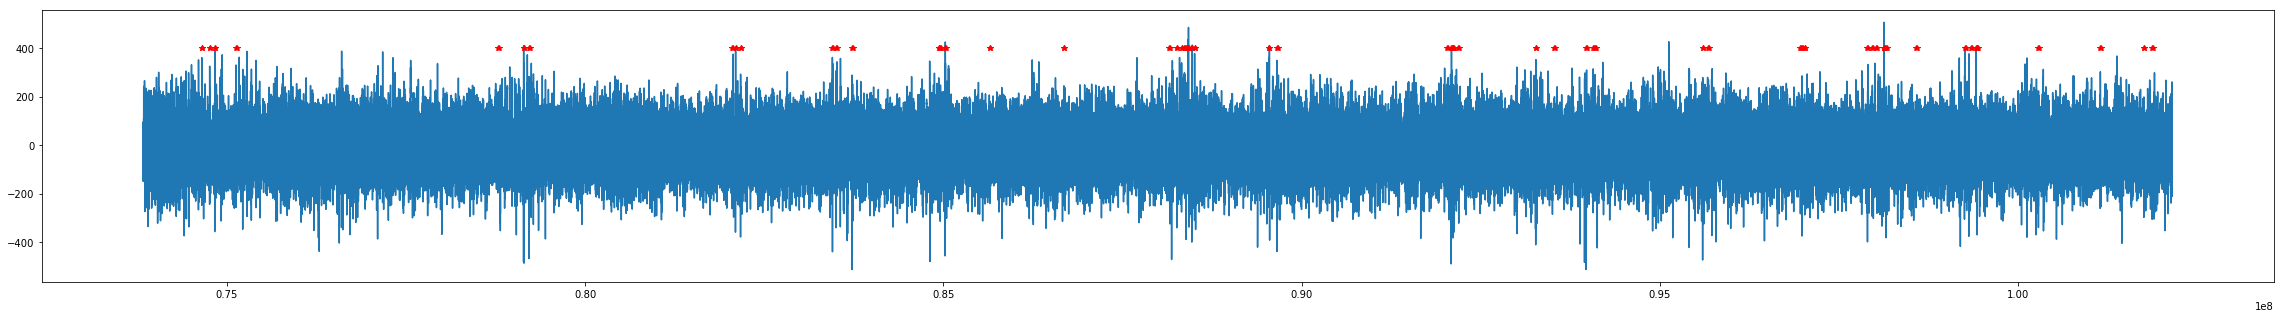

In [8]:
for group in ripple_data.groupby('ntrode_id'):
    plt.figure(figsize=[40,5])
    lfp_data = group[1]['lfp_data']
    timestamp = group[1]['timestamp']
    plt.plot(timestamp, lfp_data)
    plt.plot(stim_lockout_ranges.values.transpose(), np.tile([[400], [400]], [1, len(stim_lockout_ranges)]), 'r-*' )
plt.show()

In [ ]:
plt.plot([[0, 1]], [[10, 10]], '-*')
plt.show()

In [ ]:
pd.set_option('display.max_rows', 10)

ripple_data